# <i>Introduzione e finalità. </i>
*Questo lavoro è focalizzato nel trovare similarità tra i ceppi dei genomi del COVID-19. Nello specifico usiamo la Localitive Sensitive Hashing per identificare le coppie candidate di sequenze di DNA di COVID-19 simili e come risultato ci si aspetta che queste abbiano la stessa provenienza geografica. Un altro obbiettivo è dimostare l'effecienza dell'LSH da punto di vista della time complexity e di come sia migliore rispetto ai classici algoritmi deterministici.*

# <i> Preparazione dei dati </i>
*In questa fase l'obbiettivo principale è quello di generare il dataset sul quale applicare le analisi.
Mediante l'utilizzo di pandas e altre funzioni volte all'ispezione dei dati, si capirà come è formato il dataset.*

In [1]:
import pandas as pd

In [2]:
# Caricamento dati.
dnasequence = pd.read_csv("genomes.csv").set_index("NCBI ID")

In [3]:
dnasequence

,FASTA description,Genome collection date,Locallity,Sequence,YP_009725297.1,YP_009725298.1,YP_009725299.1,YP_009725300.1,YP_009725301.1,YP_009725302.1,YP_009725303.1,YP_009725304.1,YP_009725305.1
NCBI ID,,,,,,,,,,,,,
LR757995,LR757995.1 Wuhan seafood market pneumonia viru...,2019-12-26,China: Wuhan,TTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTG...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...,AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAK...,NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
MT334534,MT334534.1 Severe acute respiratory syndrome c...,2020-03-13,USA: UT,TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...,AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAK...,NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
MT291836,MT291836.1 Severe acute respiratory syndrome c...,2020-01-29,China: Beijing,TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...,AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAK...,NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
MT326117,MT326117.1 Severe acute respiratory syndrome c...,2020-03-20,USA,TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFFYENAFLPFA...,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...,AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAK...,NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
MT291832,MT291832.1 Severe acute respiratory syndrome c...,2020-01-25,China: Beijing,TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...,AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAK...,NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT350250,MT350250.1 Severe acute respiratory syndrome c...,2020-03,USA: VA,AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCT...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...,AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAK...,NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
MT123291,MT123291.2 Severe acute respiratory syndrome c...,2020-01-29,China: Guangzhou,AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCT...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,APTKVTFGDD

In [6]:
# Identifica il numero di colonne e l'occorrenza di ogni elemento nelle varie colonne del dataset.
dnasequence.shape

(367, 13)

In [7]:
dnasequence.describe().T

,count,unique,top,freq
FASTA description,367,367,MT293188.1 Severe acute respiratory syndrome c...,1
Genome collection date,367,76,2020-03-13,21
Locallity,367,71,USA: WA,106
Sequence,367,367,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,1
YP_009725297.1,367,10,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,344
YP_009725298.1,367,29,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...,251
YP_009725299.1,367,56,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...,290
YP_009725300.1,367,17,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...,349
YP_009725301.1,367,9,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,353
YP_009725302.1,367,8,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...,332


In [8]:
# Vede se ci sono valori nulli, ovvero non riconosciuti, e nell'eventualità fa un count.
dnasequence.isnull().sum()

FASTA description         0
Genome collection date    0
Locallity                 0
Sequence                  0
YP_009725297.1            0
YP_009725298.1            0
YP_009725299.1            0
YP_009725300.1            0
YP_009725301.1            0
YP_009725302.1            0
YP_009725303.1            0
YP_009725304.1            0
YP_009725305.1            0
dtype: int64

In [8]:
# Vede se ci sono valori mancanti e nell'eventualità fa un count.
dnasequence.isna().sum()

FASTA description         0
Genome collection date    0
Locallity                 0
Sequence                  0
YP_009725297.1            0
YP_009725298.1            0
YP_009725299.1            0
YP_009725300.1            0
YP_009725301.1            0
YP_009725302.1            0
YP_009725303.1            0
YP_009725304.1            0
YP_009725305.1            0
dtype: int64

# <i> Librerie Importate </i>
<i>Importiamo tutte le librerie che ci serviranno nella stesura delle funzioni.</i>

In [9]:
import mmh3
import numpy as np
import sys
import time

# <i> Funzioni Operative </i>

In [17]:
# In bioinformatica, le k-mers sono sottostringhe di lunghezza k contenute in sequenze biologiche.
# Utilizzate principalmente nel contesto della genomica computazionale e dell'analisi delle sequenze, in cui
# i k-mers sono composti da nucleotidi (i.e. A, T, G, and C), i k-mers sono finalizzati a
# assemblare sequenze di DNA, migliorare l'espressione genica eterologa, identificare le specie nei campioni 
# metagenomici, e a creare vaccini.
# Quindi quando parliamo di k-mers andiamo ad identificare quelle che nella teoria della LSH definiamo come Shingles.


# La funzione genKmers prende come paramentri la sequenza del DNA e k per definire la lunghezza delle shingle
# (nel nostro caso, vista la lunghezza delle sequenze si è optato per k = 15).

def genKmers(sequences, k):
    
    # Creiamo un dizionario vuoto all'interno del quale andremo ad inserire nelle chiavi l'indice delle sequenze(NCBI_ID) e
    # nei valori tutte le shingle appartenti a quelle sequenze(sequences).
    
    sequence_to_kmers = {}

    # Set che contiene tutte le shingles.
    all_kmers = set()

    # Iteriamo tutte le righe della colonna "Sequences" del dataframe.
    # Si inizializza la località per gestire in futuro la comparazione sulle aree geografiche.
    for index, row in sequences.iterrows():
        ncbi_id = index
        sequence = row["Sequence"]
        loc = row["Locallity"]
        kmers = []
        # Crea k-mers.
        i = 0
        # Per ogni  sequenza, ogni 15 caratteri  creiamo una k-mer da aggiungere alla lista 'k-mers' e a 'all_kmers'.
        while i + k < len(sequence):
            kmer = sequence[i: i + k]
            kmers.append(kmer)
            all_kmers.add(kmer)
            # La shingle successiva inizia dopo 3 caratteri della precedente.
            i += 3
            # Ad ogni indice associamo la sua k-mer.
        sequence_to_kmers[ncbi_id, loc] = kmers

    print("Sono state generate", str(len(all_kmers)), "k-mers")

    # Restituiamo 'sequence_to_kmers' contenente tutte le shingle di una sequenza associate al proprio indice
    # 'all_kmers' contenente tutte le shingle.
    return sequence_to_kmers, all_kmers


# Creiamo la signatureMatrix.
# Prendiamo in input la sequenza di kmers con indice associato e il numero di hashes che vogliamo generare (b*r).

def creaSignatureMatrix(sequence_to_kmers, num_hashes):

    signatures = []
    # Utilizziamo time per conoscere il tempo di esecuzione.
    start_time = time.time()

    # Iteriamo sequenze e kmers in sequence_to_kmers precedentemente creato.
    for sequence, kmers in sequence_to_kmers.items():
        signature_list = []

    # Iteriamo per tutte le permutazioni.
        for index in range(num_hashes):

            minimum = sys.maxsize
            # Generiamo l'hash function per tutte le shingles di kmers.
            for kmer in kmers:
                hashed = hashKmer(kmer, index)
                # Troviamo il più piccolo codice hash  per tutte le shingles.
                if hashed < minimum:
                    minimum = hashed
            signature_list.append(minimum)
# Aggiungiamo i valori hashed di ogni sequenza e per ogni permatuazione alla signaturematrix.
        signatures.append(signature_list)
    elapsed_time = time.time() - start_time

    print("La signature matrix è stata calcolata.")
    # Restituiamo la matrice generata e il tempo di esecuzione.
    return signatures, elapsed_time


# Trova le coppie candidate utilizzando la lsh.
def LSHcandidatePairs(sequence_to_kmers, b, r):
    sequence_ids = list(sequence_to_kmers.keys())

    hash_tables = []
    candidate_pairs = set()
    candidate_index = set()
    start_time = time.time()

    
    # Creiamo le hash tables per ogni banda contenenti tutte le bande dei minHash ottenuti da ogni sequenza.
    # Dividiamo la matrice in b bands ed r raws.
    # Iteriamo per ogni band della matrice.
    
    for band in range(1, b + 1):
        hash_table = {}
        # Iteriamo ogni row della band iterata.
        for col in range(len(sequence_ids)):
            # Salviamo una row.
            band_sig = signatures[col][(band - 1) * r: band * r]
            # Produciamo l'hash di ogni colonna della sigrature matrix.
            hash_value = mmh3.hash(str(band_sig), 42, signed=False)
            # Diamo un identificativo ad ogni bucket.
            bucket_num = hash_value % num_buckets
            # Se è un bucket nuovo creiamo una nuova hash table.
            if bucket_num not in hash_table:
                hash_table[bucket_num] = set()
            # Aggiungiamo l'id della sequenza hashata nell'hash table.
            hash_table[bucket_num].add(sequence_ids[col])
    # Le coppie di colonne candidate
    # sono quelle che che successivamente all'hash si troveranno nello stesso bucket
    # per una o più band perchè sequenze più simile hanno più probabilità di generare lo stesso minhash.
    
        # Itermiamo per tutti gli hash_table creati.
        for bucket_num, sequences in hash_table.items():
            for id1 in sequences:
                for id2 in sequences:
                    # Evitiamo di mettere una stessa sequenza come coppia candidata.
                    if id1 != id2:
                        # Aggiungiamo tutte le altre nella tupla candidate pairs.
                        candidate_pairs.add(tuple(sorted((id1, id2))))

        hash_tables.append(hash_table)

    elapsed_time = time.time() - start_time

    print("Sono state generate", len(candidate_pairs), "coppie candidate")

    return candidate_pairs, hash_tables, elapsed_time

# Passiamo la kmer generata fissando un seed a 42.
def hashKmer(kmer, seed=42):
# Restituisce un interno a 32 bit rappresentante l'hash function della k-mer.
    return mmh3.hash(kmer, seed)

# Restiruisce l'indece di jacard tra 2 kmers calcolato come intersezione/unione.

def jaccardInd(kmers1, kmers2):

    kmers1 = set(kmers1)
    kmers2 = set(kmers2)

    intersection = len(kmers1.intersection(kmers2))
    union = len(kmers1.union(kmers2))

    return intersection / union

# Calcola l'indice di jacard per ogni coppia candidata.
def jaccardSim(candidate_pairs, sequence_to_kmers):
    sims = []

    start_time = time.time()
    for pair in candidate_pairs:
        sims.append(jaccardInd(sequence_to_kmers[pair[0]], sequence_to_kmers[pair[1]]))
    elapsed_time = time.time() - start_time

    return sims, elapsed_time

# Identifichiamo le coppie candidate con un algoritmo deterministico
def all_candidate_pairs(sequence_to_kmers, threshold):
    candidate_pairs = set()
    jaccard_similarities = []

    start_time = time.time()
    for id1 in sequence_to_kmers.keys():
        for id2 in sequence_to_kmers.keys():
            if id1 != id2:
                jaccard_similarity = jaccardInd(sequence_to_kmers[id1], sequence_to_kmers[id2])
                if jaccard_similarity >= threshold:
                    candidate_pairs.add(tuple(sorted((id1, id2))))
                    jaccard_similarities.append(jaccard_similarity)
    elapsed_time = time.time() - start_time

    print("Sono state generate", len(candidate_pairs), "coppie candidate.")

    return candidate_pairs, jaccard_similarities, elapsed_time


# <i> Visualizzazione dei dati </i>

In [11]:
# Importiamo "MatPlot" che ci permette di generare output visivi.
import matplotlib.pyplot as plt

In [12]:
# La funzione che segue genera tutte le curve delle possibili combinazioni provenienti dall'input di 
# b_value ed r_value appartenenti alla funzione visualize.
# Per ognuna di queste genererà anche una treshold relativa alla similarità.

def plot_probability_of_candidate_pair(b_values, r_values, title):
    similarities = np.arange(0.0, 1.01, 0.01) #Similarità su numeri da 0 a 1 con intervalli di 0.01
    probabilities = []
    similarity_thresholds = []
    
    # lables rappresenta la legenda dei vettori b_values ed r_values.
    labels = ["".join(["b=", str(b_values[i]), ", r=", str(r_values[i])]) for i in range(len(b_values))] 
    
    # Ciclo for che itera sui valori di b andando a combinarli con r per trovare la similarità in funzione degli 
    # iperparametri passati in input (b & r).
    # Per tutte le bands prendiamo i valori di b e r e in funzione della similarità, calcola la probabilità p
    # che due sequenze data t similarity condividano lo stesso bucket formando il vettore probability.
    for i in range(len(b_values)):
        b = b_values[i]
        r = r_values[i]
        for t in similarities:
            p = 1 - (1 - t ** r) ** b # Probabilità che le signatures siano simili su tutte le rows di almeno una band
                                      # e che queste siano indirizzate dopo la funzione di hash 
                                      # nello stesso bucket e considerate come coppie candidate simili. 
                                      # (Almeno una band identica).
            probabilities.append(p)
        plt.plot(similarities, probabilities, label=labels[i])
        probabilities = []
        similarity_thresholds.append((1 / b) ** (1 / r)) # Formula utilizzata per generare una threshold tale da 
                                                         # ridurre al minimo la presenza di falsi positivi nel 
                                                         # momento della selzione delle coppie candidate.

    # Le formule sopra riportate per la gestione della threshold e per la probabilità di selezione delle candidate pairs
    # sono state prese in considerazione con riferimento al testo citato nell'Ullman.
                
    for t in similarity_thresholds:
        plt.axvline(x=t, c='gray', alpha=0.5) # Genera una linea verticale di colore grigio che andrà a definire
                                              # la treshold della somiglianza tra le sequenze riportate in una coppia.
    
    # Si definiscono i parametri per il plot.
    plt.title(title)
    plt.xlabel("Similarità tra 2 sequenze")
    plt.ylabel("Probabilità che 2 sequenze condividano un bucket")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Di seguito si plotta l'histogramma della jaccard similarities per le coppie candidate generate usando l'LSH date b & r
# inoltre printa un esempio delle prime 30 coppie candidate e fa un count sulle occorrenze delle coppie provenienti
# aree geografiche limitrofe.

def plot_histogram_of_jaccard_similarities(sequence_to_kmers, b, r):
    signatures, sig_matrix_time = creaSignatureMatrix(sequence_to_kmers, b * r)
    candidate_pairs, hash_tables, cand_pair_time = LSHcandidatePairs(sequence_to_kmers, b, r)
    jaccard_similarities, jacc_sim_time = jaccardSim(candidate_pairs, sequence_to_kmers)

    
    
    c = 0
    for i in candidate_pairs:
        if c <= 30:
            c += 1
            print (i)
            
    # Printiamo i primi 30 items del set per avere un output visivo delle sequenze in funzione della provenienza.
    

    count = 0
    cp = list(candidate_pairs)
    for i in cp:
        Li = list(i)
        #print(Li[0][1],"----", Li[1][1])
        if Li[0][1][0:3] == Li[1][1][0:3]:
            #print(Li[0][1][0:3])
            count += 1
    
    print("Su un totale di: ", len(candidate_pairs), "Le coppie provenienti dalla stessa area geografica sono: ", count)
     
    # Questa iterzione ci permette innanzi tutto di iterare sul set trasformandolo in Lista, successivamente andiamo 
    # contare le volte in cui il primo elemento della tupla presente in ogni i della lista, inizia per le stesse 
    # lettere del secondo elemento della tupla, in questo modo generalizziamo le aree geografiche in stringhe di tre 
    # lettere più facili da confrontare.




    
    plt.title("Distribuzione della Jaccard Similarity di coppie candidate per un LSH con b=" + str(b) + ", r=" + str(r))
    plt.xlabel("Jaccard Similarity delle coppie candidate")
    plt.xlim(0.95,1)
    plt.ylabel("Count")
    plt.hist(jaccard_similarities, bins=600)
    plt.show()
    # Le funzioni plt. servono per andare a configurare il grafico.


# Funzione per definire una tabella di complessità per confrontare l'algoritmo deterministico e la funzione di 
# LSH per diverse band e row.
# Prende come parametro la sequenza delle k-mers.

def complexTable(sequence_to_kmers):

    # Settiamo i parametri b ed r che vogliamo confrontare.
    b_values = [2, 2, 5]
    r_values = [7, 50, 20]

    # Creiamo i seguenti vettori:
    sig_matrix_times = [] # Tempo di creazione la signature matrix.
    cand_pair_times = [] # Tempo di creazione delle coppie candidate.

    num_pairs = [] # Numero delle coppie candidate create.
    avg_sims = [] # Media dei valori di Jaccard Similarity delle coppie candidate.


    # Eseguiamo la LSH per i valori b ed r dati in input.
    for i in range(len(b_values)):
        print(i)

        b = b_values[i]
        r = r_values[i]
        
        # Applichiamo la LSH.
        signatures, sig_matrix_time = creaSignatureMatrix(sequence_to_kmers, b * r)
        candidate_pairs, hash_tables, cand_pair_time = LSHcandidatePairs(sequence_to_kmers, b, r)
        jaccard_similarities, jacc_sim_time = jaccardSim(candidate_pairs, sequence_to_kmers)
        jaccard_similarities = np.array(jaccard_similarities)

        # Aggiungiamo i valori trovati nei vettori precedentemente generati.
        sig_matrix_times.append(sig_matrix_time)
        cand_pair_times.append(cand_pair_time)
        num_pairs.append(len(candidate_pairs))
        avg_sims.append(np.average(jaccard_similarities))

    # Creiamo il DataFrame con i vettori di riferimento.    
    table = pd.DataFrame(list(zip(sig_matrix_times, cand_pair_times, num_pairs, avg_sims)),
                         index = ["".join(["b=", str(b_values[i]), ", r=", str(r_values[i])]) for i in range(len(b_values))],
                         columns =['Runtime for Generating Signature Matrix', 'Runtime for Getting Candidate Pairs', 'Number of Candidate Pairs', 'Average Jaccard Similarity of Candidate Pairs'])

    return table


In [13]:
# La funzione "visualize" permette di generare due grafici che ci aiutano a comprendere come cambia la treshold della
# similarità in funzione del variare di bands e rows.
# Ciò che facciamo è creare 2 grafici, il primo con un numero di hash totali di 200 e il secondo di 100 e vediamo 
# anzitutto come variano al variare del matching b & r e poi vediamo come variano tra di loro.
# L'ultimo plot è riferito all'istogramma inerente alla distribuzione delle coppie candidate.

def visualize(sequence_to_kmers):


    plot_probability_of_candidate_pair(b_values=[2, 4, 8, 10, 25, 50, 100],
                                       r_values=[100, 50, 25, 20, 8, 4, 2],
                                       title="Probabilità di coppie candidate con num_hashes=200")
    plot_probability_of_candidate_pair(b_values=[2, 4, 5, 10, 20, 25, 50],
                                       r_values=[50, 25, 20, 10, 5, 4, 2],
                                       title="Probabilità di coppie candidate con num_hashes=100")

    plot_histogram_of_jaccard_similarities(sequence_to_kmers, b=2, r=50)


# <i> Funzione Main </i>

Done generating 33101 kmers
Done computing signature matrix
Done generating 15947 candidate pairs


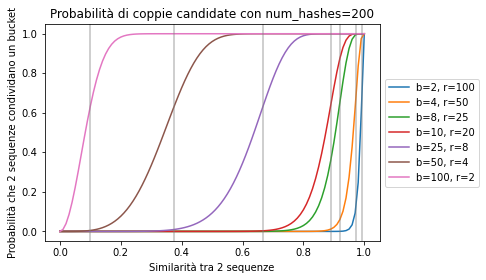

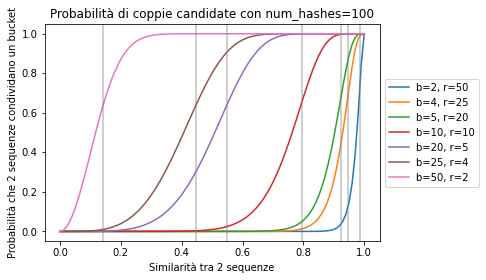

Done computing signature matrix
Done generating 15947 candidate pairs
(('MT308702', 'USA: NC'), ('MT326154', 'USA'))
(('MT276324', 'USA: CA'), ('MT344957', 'USA: PA'))
(('MT308702', 'USA: NC'), ('MT345873', 'USA: CT'))
(('MT326036', 'USA'), ('MT326149', 'USA'))
(('MN996528', 'China: Wuhan'), ('MT159722', 'USA'))
(('MT259226', 'China: Hubei - Wuhan'), ('MT326104', 'USA'))
(('MT093571', 'Sweden'), ('MT334547', 'USA: UT'))
(('MT325581', 'USA: LA'), ('MT334547', 'USA: UT'))
(('MT233526', 'USA: WA'), ('MT263394', 'USA: WA'))
(('MT159708', 'USA'), ('MT344946', 'USA: GA'))
(('LR757996', 'China: Wuhan'), ('MT246457', 'USA: WA'))
(('MT246450', 'USA: WA'), ('MT322408', 'USA: VA'))
(('MT251976', 'USA: WA'), ('MT326023', 'USA'))
(('MT019532', 'China: Hubei - Wuhan'), ('MT350244', 'USA: VA'))
(('MT344961', 'USA: NV'), ('MT344962', 'USA: MN'))
(('MT159718', 'USA'), ('MT304490', 'USA: TX'))
(('MT259229', 'China: Hubei - Wuhan'), ('MT293163', 'USA: WA'))
(('LC528232', 'None'), ('MT326036', 'USA'))
(('

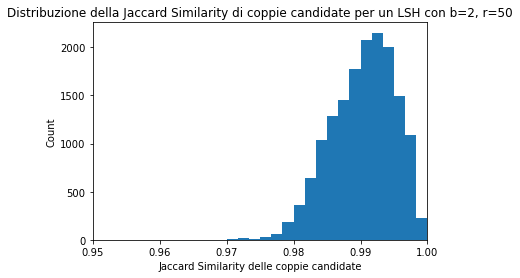

0
Done computing signature matrix
Done generating 26019 candidate pairs
1
Done computing signature matrix
Done generating 15947 candidate pairs
2
Done computing signature matrix
Done generating 25686 candidate pairs


In [14]:
# Iperparametri
k = 15

b = 2
r = 50
num_hashes = b * r

num_buckets = 400 # Numero dei bucket nella tabella delle hash.
                  # Scelto in funzione della radice del numero totale di kmers moltiplicato per due. (Roule of thumb)

# LSH

sequence_to_kmers, all_kmers = genKmers(dnasequence, k)
signatures, sig_matrix_time = creaSignatureMatrix(sequence_to_kmers, num_hashes)
candidate_pairs, hash_tables, cand_pair_time = LSHcandidatePairs(sequence_to_kmers, b, r)


visualize(sequence_to_kmers)
table = complexTable(sequence_to_kmers)


In [11]:
candidate_pairs, jaccard_similarities, cand_pair_time = all_candidate_pairs(sequence_to_kmers, threshold=0.9)
jaccard_sim = np.array(jaccard_similarities)


table.loc['ALGORITMO DETERMINISTICO'] =['/', cand_pair_time,len(candidate_pairs), np.average(jaccard_sim)]
table.style



Done generating 26131 candidate pairs


,Runtime for Generating Signature Matrix,Runtime for Getting Candidate Pairs,Number of Candidate Pairs,Average Jaccard Similarity of Candidate Pairs
"b=2, r=7",44.510330,0.473187,26019,0.988903
"b=2, r=50",348.555498,0.092245,15947,0.989015
"b=5, r=20",338.637326,0.186012,25686,0.989013
ALGORITMO DETERMINISTICO,/,751.183012,26131,0.988897


# <i> Analisi dei risultati. </i>

## <i> Come varia la treshold al variare degli iperparametri. </i>
*Come è possibile intuire dai risultati riportati nei primi due grafici, ci sarà una differenza tangibile nel momento in cui varieranno i parametri b & r all'interno del modello. 
All'aumentare di b (bands) diminuirà il numero di r (rows) per banda, ciò comporterà, da un punto di vista teorico, una riduzione del numero di possibili elementi da inserire nei vari buckets per ogni band.
Il basso numero di r rows per ogni banda comporterà una treshold molto meno marcata, che porterà a classificare come simili anche elementi che in fondo non lo sono.
Viceversa, al diminuire delle bande e all'aumentare delle rows, ci saranno più elementi da indirizzare al bucket per ogni banda, questo comporterà una treshold più marcata.
Nel caso da noi trattato con 2 b e 50 r, per un totale di 100 hashes, abbiamo dimostrato che la maggior parte delle coppie candidate sono distribuite dopo il 97° percentile.*

## <i> Descrizione delle prime 30 coppie definite simili dalla LSH. </i>
*Dalla print delle prime 30 coppie simili, grazie all'utilizzo della colonna della Località, è possibile confrontare ad occhio se la provenienza della sequenza del DNA è la stessa/limitrofa. 
Da un primo sguarda è evidente che, considerando la grandezza di stati come gli USA o la Cina, molte sequenze provengono da regioni differenti della stessa nazione. 
Per generalizzare in maniera più concreta, abbiamo deciso di allargare il range di ricerca all'intera nazione, individuando su un totale di 16241 coppie candidate come simili, una provenienza analoga di 9484 coppie.
Questo ci fa capire che la nostra supposizione iniziale, ovvero che se le sequenze appartengono alla stessa area geografica se simili e quindi provenienti dallo stesso ceppo, è fondata, ma non sempre vera.
Trattandosi di un virus che nonostante tutto si è diffuso in lungo e in largo, molto spesso capita, come è possibile vedere dalla print, che sequenze simili e appartenenti al medesimo ceppo provengono da paesi completamente opposti da un punto di vista geografico.*

## <i> Descrizione dell'istogramma. </i>
*L'istogramma che abbiamo come risultato è frutto della scelta del numero di b & r da noi adottato ovvero rispettivamente 
2 & 70 per un totale di 140 shingles. 
Questo dato ci permette di provare l'osservazione teorica riportata nella sezione descrittiva dei grafici rappresentanti il variare della treshold, ovvero che con un b basso e un r abbastanza grande, la treshold si innalzerà in maniera marcata.
Com'è intuibile da un primo sguardo, la treshold in questione si poserà sul 97° percentile, come già definito in precedenza e tutte le coppie definite simili dalla nostra LSH saranno distribuite dopo questo percentile.
Per poter generare questo istogramma in maniera tale da mostrare la distribuzione abbiamo usato un numero di bins = 600, in questo modo è più facile da vedere poichè resa più smooth.
I bins definiscono per l'appunto l'area di ogni barra dell'istogramma.*

# <i> Conclusioni </i>
<i> Questo lavoro aveva l'intento di trovare coppie candidate tra genomi del virus sar-cov 2. Siamo riusciti nell'intento per una percentuale di coppie candidate proveniente dalla stessa regione maggiore al 60\%. Tuttavia bisogna considerare che:
1. L'intero algoritmo(LSH) è basato sulla probabilità che elementi con una certa similarità facciano l'hash insieme e a causa di questa natura probabilistica non è garantito il miglior risultato. 

2. Non è detto che genomi provenienti da diverse regioni appartengano a diversi ceppi di DNA, considerando la semplicità di mobilità di questo periodo storico e i sempre più frequenti rapporti tra oriente ed occidente del 21esimo secolo. 
    
3. Il dataset utilizzato è estremamente piccolo per un'analisi di questo tipo, ricordiamo infatt che in campo biomedico si utilizzano dataset molti grandi e strumenti efficienti per ottenere il miglior risultato possibile.  </i>